![title](data/Hor.png)

**1**.(20 points)

On considère le système linéaire suivant:

$$(S) : \quad\left\{
\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}\right.$$

1. Trouver la notation matricielle du système $(S)$ sous la forme $Ax=b$ avec  $A$ et $b$ deux matrices que l'on implementera avec numpy. (5 points)
2. Montrer que $A$ est inversible (5 points)
3. Vérifier que $A$ possède une décomposition $LU$, résoudre le système $(S)$ en utilisiant cette décomposition (10 points)

In [2]:
import numpy as np
import scipy.linalg as la

In [6]:
# question 1
A =np.array([[2,-1,1],[-1,2,-1],[1,-1,1]])
A

array([[ 2, -1,  1],
       [-1,  2, -1],
       [ 1, -1,  1]])

In [11]:
b = np.array([6,2,1]).reshape(3,1)
b
#b1=np.array([[6],[2],[1]])
#b1

array([[6],
       [2],
       [1]])

In [17]:
# question 2
#np.linalg.det(A)
la.det(A)

1.0

In [19]:
P, L, U = la.lu(A)
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [20]:
L

array([[ 1.        ,  0.        ,  0.        ],
       [-0.5       ,  1.        ,  0.        ],
       [ 0.5       , -0.33333333,  1.        ]])

In [21]:
U

array([[ 2.        , -1.        ,  1.        ],
       [ 0.        ,  1.5       , -0.5       ],
       [ 0.        ,  0.        ,  0.33333333]])

In [22]:
y = la.solve(L,b)

In [23]:
y

array([[ 6.        ],
       [ 5.        ],
       [-0.33333333]])

In [24]:
x = la.solve(U,y)

In [25]:
x

array([[ 5.],
       [ 3.],
       [-1.]])

In [14]:
la.inv(A).dot(b)

array([[ 5.],
       [ 3.],
       [-1.]])

In [28]:
A.dot(x)
A @ x
# A.x

array([[6.],
       [2.],
       [1.]])

**2**. (20 points)

On considére la séquence d'ADN suivante sous le format FASTA.
>Le format FASTA est utilisé pour stocker une ou plusieurs séquences, d'ADN, d'ARN ou de protéines. La première ligne débute par le caractère > et contient une description de la séquence. On appelle souvent cette ligne « ligne de description » ou « ligne de commentaire »

```python
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
```

1. Supprimez la ligne de commentaire et combinez les 4 lignes de symboles nucléotidiques en une seule chaîne (4 points)
2. Construire une matrice de transition de Markov empirique pour les probabilités de transition de n'importe quel nucléotide à n'importe quel autre nucléotide de cette chaîne (8 points)
3. Trouver la distribution stationaire de cette chaine ( Utiliser les vecteurs propre de $M^T$) (8 points)

In [3]:
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'
'''
seq =dna.split('\n')[1:]
res=''
for ch in seq:
    res=res+ch
res

"TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAACGACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGAGCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGGACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'"

In [4]:
seq = ''.join(dna.strip().split('\n')[1:])
seq

"TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAACGACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGAGCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGGACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'"

In [37]:
ch='   abcd  '
ch=ch.strip()
ch

'abcd'

In [34]:
M=np.zeros((4,4))
M

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [5]:
#ch='akgdhdjdkdkdlkdldmlekrjakdkjdkaaa'
#--->'ak','kg','gd','dh',...
L=[]
for i in range(len(seq)-1):
    L.append(seq[i:i+2])
L[:5]
    

['TT', 'TA', 'AG', 'GG', 'GC']

In [7]:
s=set(L)
dic={u:L.count(u) for u in s}
dic

{'CG': 33,
 'TG': 11,
 'CT': 12,
 'AG': 22,
 "A'": 1,
 'TA': 19,
 'CC': 20,
 'AA': 26,
 'AC': 25,
 'GA': 19,
 'GC': 24,
 'GT': 23,
 'GG': 22,
 'CA': 21,
 'AT': 11,
 'TT': 14,
 'TC': 17}

In [36]:
# Ecrire votre code içi
#Première méthode
# Esayer d'utiliser Counter ( from collections import Counter)

Counter({('T', 'T'): 14,
         ('T', 'A'): 19,
         ('A', 'G'): 22,
         ('G', 'G'): 22,
         ('G', 'C'): 24,
         ('C', 'A'): 21,
         ('G', 'T'): 23,
         ('A', 'A'): 26,
         ('A', 'C'): 25,
         ('C', 'C'): 20,
         ('C', 'G'): 33,
         ('G', 'A'): 19,
         ('A', 'T'): 11,
         ('T', 'C'): 17,
         ('T', 'G'): 11,
         ('C', 'T'): 12,
         ('A', "'"): 1})

In [37]:
#Deuxième méthode utiliser Liste , ensemble et dictionnaire

#s={__________________}
#l=[_____________________]
#dic={u:l.count(u) for u in s}
#dic

{('T', 'C'): 17,
 ('A', 'G'): 22,
 ('T', 'T'): 14,
 ('G', 'G'): 22,
 ('A', 'A'): 26,
 ('G', 'A'): 19,
 ('C', 'T'): 12,
 ('C', 'C'): 20,
 ('A', "'"): 1,
 ('C', 'A'): 21,
 ('G', 'T'): 23,
 ('C', 'G'): 33,
 ('G', 'C'): 24,
 ('A', 'C'): 25,
 ('T', 'A'): 19,
 ('A', 'T'): 11,
 ('T', 'G'): 11}

In [32]:
# Matrice des étas de transition non normalisée 
M = np.zeros((4,4))
for i, x in enumerate('ACTG'):
    #print(i,x)
    for j, y in enumerate('ACTG'):
        M[i, j] = dic[x+y]
M

array([[26., 25., 11., 22.],
       [21., 20., 12., 33.],
       [19., 17., 14., 11.],
       [19., 24., 23., 22.]])

In [33]:

w=M.sum(axis=1).reshape(4,1)
w
M,w


(array([[26., 25., 11., 22.],
        [21., 20., 12., 33.],
        [19., 17., 14., 11.],
        [19., 24., 23., 22.]]),
 array([[84.],
        [86.],
        [61.],
        [88.]]))

In [34]:
res=np.zeros((4,4))
res
for i in range(0,4):
    for j in range(0,4):
        res[i,j]=M[i,j]/w[i]
res


array([[0.30952381, 0.29761905, 0.13095238, 0.26190476],
       [0.24418605, 0.23255814, 0.13953488, 0.38372093],
       [0.31147541, 0.27868852, 0.2295082 , 0.18032787],
       [0.21590909, 0.27272727, 0.26136364, 0.25      ]])

In [39]:
for i in range(4):
    print(res[i,:].sum())

1.0
1.0
1.0
1.0


In [41]:
#Normalisation de la matrice==> matrice de la chaine de Markov Markov
M = M/w


In [42]:
M

array([[0.30952381, 0.29761905, 0.13095238, 0.26190476],
       [0.24418605, 0.23255814, 0.13953488, 0.38372093],
       [0.31147541, 0.27868852, 0.2295082 , 0.18032787],
       [0.21590909, 0.27272727, 0.26136364, 0.25      ]])

In [43]:
# Trouver la distribution stationnaire avec la méthode des vecteurs propres
e, v = la.eig(M.T)
e

array([ 1.        +0.j       ,  0.03786645+0.0984321j,
        0.03786645-0.0984321j, -0.05414276+0.j       ])

In [44]:
v

array([[ 0.52737509+0.j        , -0.26318022-0.44557586j,
        -0.26318022+0.44557586j,  0.40452326+0.j        ],
       [ 0.533761  +0.j        , -0.08281119-0.03767378j,
        -0.08281119+0.03767378j, -0.51932821+0.j        ],
       [ 0.37172   +0.j        ,  0.63696557+0.j        ,
         0.63696557-0.j        , -0.47178041+0.j        ],
       [ 0.54662505+0.j        , -0.29097417+0.48324964j,
        -0.29097417-0.48324964j,  0.58658536+0.j        ]])

In [45]:
# Trouver le vecteur propre réel associé à 1
v = np.real_if_close(v[:, 0])
v

array([0.52737509, 0.533761  , 0.37172   , 0.54662505])

In [46]:
# Distribution stationnaire 
p =v/v.sum()

In [47]:
p

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

In [48]:
p @ M

array([0.26642087, 0.26964692, 0.18778658, 0.27614562])

**3**. (20 points)

Une laitière est au point A et doit se rendre au point B. Cependant, elle doit également remplir un seau d'eau de la rivière en route de A à B. L'équation du chemin de la rivière est illustrée dans la figure ci-dessous. Quelle est la distance minimale qu'elle doit parcourir pour faire cela ?

1. Résoudre ce problème avec  `scipy.optimize` et la minimisation avec contraintes (15 points)
2. Representer la solution (5 point)

![Milkmaid problem](data/milkmaid.png)

Hint: Il y a un optimum global et local pour ce problème 

In [49]:
import scipy.optimize as opt

In [57]:
### Compléter le code 

def f(M, A, B):
    """Distance entre deux points"""
    return la.norm(M-A)+la.norm(M-B)

def g(x):
    """Equation de la rivière """
    return 10/(1+x)

A = np.array([2,8])
B = np.array([8,4])
t=np.linspace(0,10,50)
cons = {'type': 'eq', 'fun': lambda x: x[1] - g(x[0])}

ms = [opt.minimize(f, [x0, g(x0)], args=(A,B), constraints=cons) for x0 in t]
m = min(ms, key=lambda res: res.fun)

print("Distance minimale", m.fun)
m

Distance minimale 9.96339829938263


     fun: 9.96339829938263
     jac: array([-1.65294075, -0.38807642])
 message: 'Optimization terminated successfully'
    nfev: 68
     nit: 18
    njev: 18
  status: 0
 success: True
       x: array([0.53225962, 6.52630915])

In [58]:
%matplotlib inline

import matplotlib.pyplot as plt

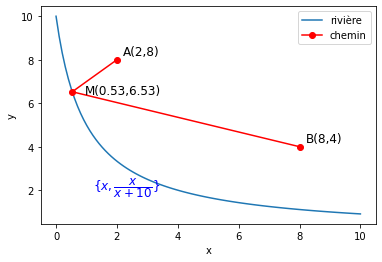

In [72]:
xp = np.linspace(0, 10, 100)
plt.plot(xp, g(xp),label='rivière')
plt.plot([A[0], m.x[0], B[0]], [A[1], m.x[1], B[1]], '-o', c='red',label='chemin')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.text(2.2,8.2, 'A(2,8)', fontsize=12);
plt.text(8.2,4.2, 'B(8,4)', fontsize=12);
plt.text(m.x[0]+0.4,m.x[1]-0.1, 'M({:.2f},{:.2f})'.format(m.x[0],m.x[1]), fontsize=12);
plt.text(1.2,2., r'$\{x,\dfrac{x}{x+10}\}$', fontsize=12,c='b');